In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'D:/train.csv')
data.loc[(data['Age'] < 18), 'Sex'] = 'child'

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",child,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [4]:
data.count()

PassengerId    100000
Survived       100000
Pclass         100000
Name           100000
Sex            100000
Age             96708
SibSp          100000
Parch          100000
Ticket          95377
Fare            99866
Cabin           32134
Embarked        99750
dtype: int64

In [5]:
data.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,30315,30315,30315,30315,29353,30315,30315,30288,30275,26463,30229
2,28679,28679,28679,28679,27731,28679,28679,27855,28637,3520,28609
3,41006,41006,41006,41006,39624,41006,41006,37234,40954,2151,40912


In [6]:
data.groupby('SibSp').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked
SibSp,,,,,,,,,,,
0,73308,73308,73308,73308,73308,70858,73308,69569,73208,20456,73133
1,19758,19758,19758,19758,19758,19140,19758,19507,19728,9316,19692
2,3703,3703,3703,3703,3703,3590,3703,3667,3702,1477,3696
3,1635,1635,1635,1635,1635,1580,1635,1101,1633,603,1634
4,1168,1168,1168,1168,1168,1123,1168,1115,1167,187,1167
5,132,132,132,132,132,125,132,132,132,37,132
8,296,296,296,296,296,292,296,286,296,58,296


In [7]:
data.groupby('Parch').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
Parch,,,,,,,,,,,
0,73540,73540,73540,73540,73540,71109,73540,69578,73446,22423,73372
1,12996,12996,12996,12996,12996,12542,12996,12646,12978,3644,12954
2,11236,11236,11236,11236,11236,10900,11236,11044,11216,5064,11200
3,983,983,983,983,983,948,983,869,981,547,981
4,446,446,446,446,446,432,446,446,446,171,444
5,331,331,331,331,331,321,331,328,331,145,331
6,204,204,204,204,204,198,204,202,204,33,204
9,264,264,264,264,264,258,264,264,264,107,264


In [8]:
data.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,22187,22187,22187,22187,22187,21456,22187,22187,21949,22154,12979
Q,5424,5424,5424,5424,5424,5237,5424,5424,5369,5416,4022
S,72139,72139,72139,72139,72139,69767,72139,72139,67818,72047,15045


<AxesSubplot:>

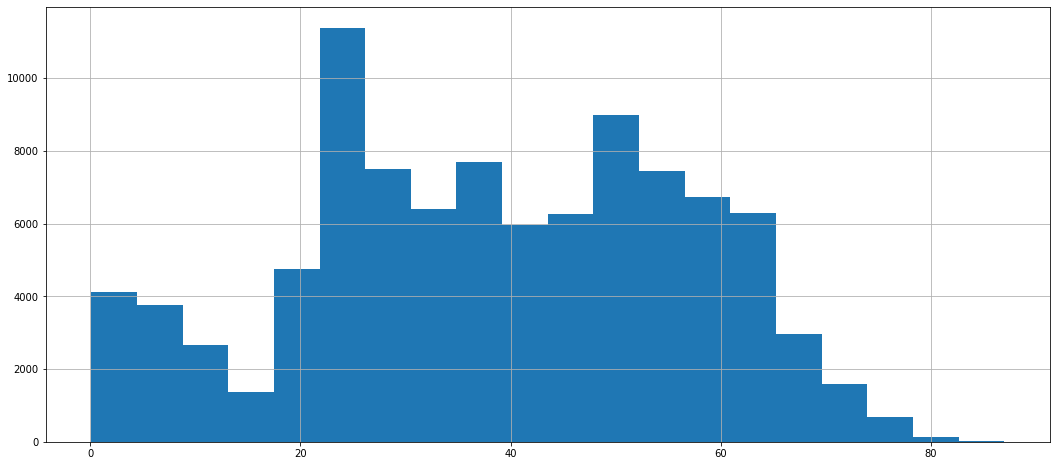

In [9]:
data['Age'].hist(bins=20,figsize=(18,8))

<AxesSubplot:xlabel='Survived', ylabel='PassengerId'>

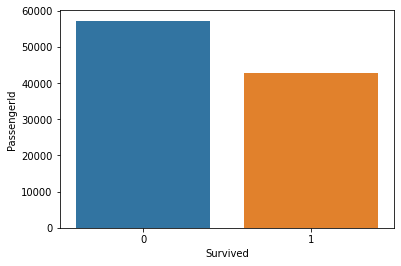

In [10]:
data_ = data.groupby('Survived').count()
sns.barplot(x=data_.index,y=data_['PassengerId'])

<AxesSubplot:xlabel='Sex', ylabel='PassengerId'>

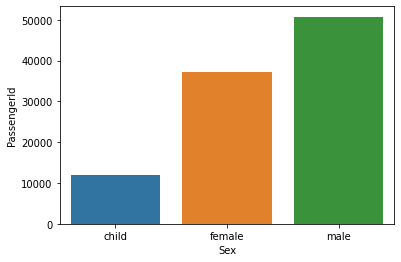

In [11]:
data_ = data_ = data.groupby('Sex').count()
sns.barplot(x=data_.index,y=data_['PassengerId'])

In [12]:
data_surv = data.query('Survived==1').drop(columns='Survived')
data_not_surv = data.query('Survived==0').drop(columns='Survived')

In [13]:
data_surv.groupby('Sex').count()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
child,5212,5212,5212,5212,5212,5212,4937,5205,766,5196
female,27128,27128,27128,26162,27128,27128,25533,27088,13587,27038
male,10434,10434,10434,10044,10434,10434,9891,10420,5204,10418


<AxesSubplot:xlabel='Sex', ylabel='Age'>

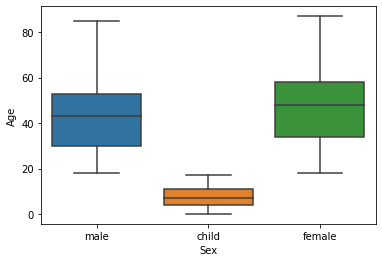

In [14]:
sns.boxplot(x=data_surv['Sex'],y=data_surv['Age'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

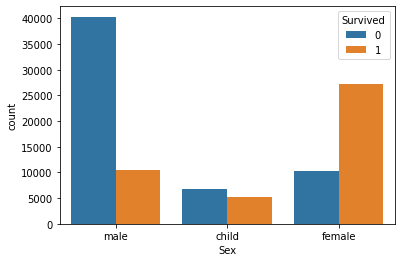

In [15]:
sns.countplot(x='Sex', hue='Survived', data=data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

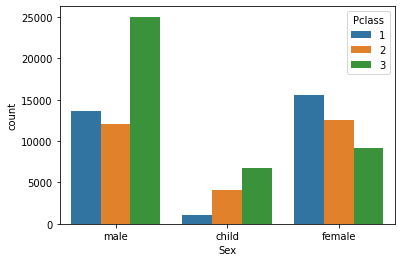

In [16]:
sns.countplot(x='Sex', hue='Pclass', data=data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

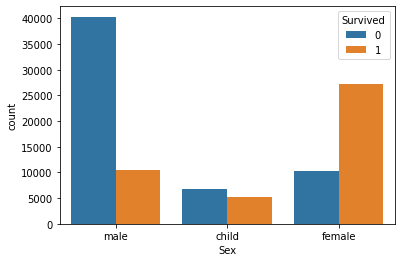

In [17]:
sns.countplot(x='Sex', hue='Survived', data=data)

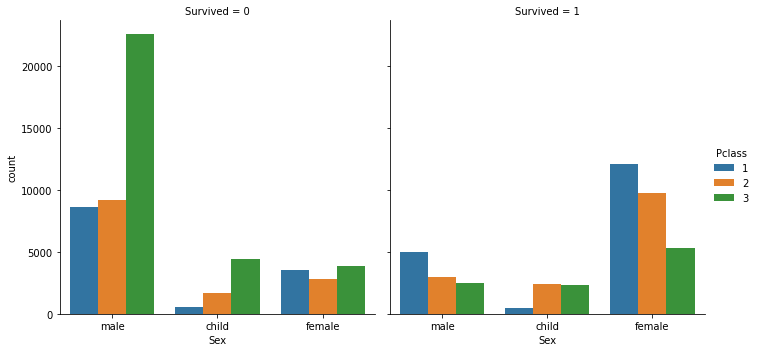

In [18]:
sns.catplot(x='Sex',hue='Pclass',col='Survived',data=data,kind='count')

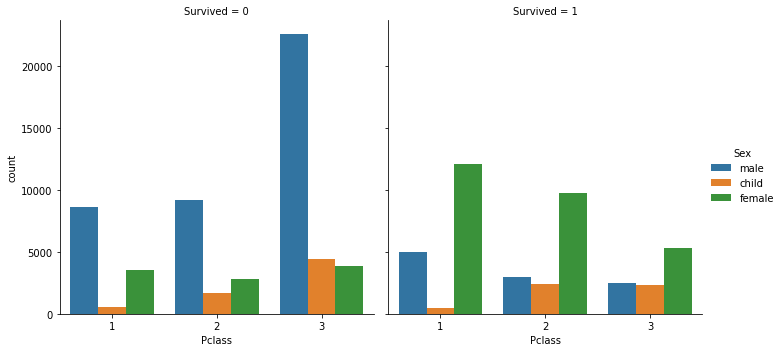

In [19]:
sns.catplot(x='Pclass',hue='Sex',col='Survived',data=data,kind='count')

# Context

# Data quality assessment

# Data exploration

# Summary